# Линейная регрессия

## Постановка задачи

Импортируем некоторые полезные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# Для красивых графиков
import seaborn as sns
sns.set_style("whitegrid")

Представим, что мы аналитики в агентстве недвижимости. У нас есть данные о стоимости аренды квартир в зависимости от их площади.

Сгенерируем эти данные (с небольшим шумом, так как в жизни цена зависит не только от площади).

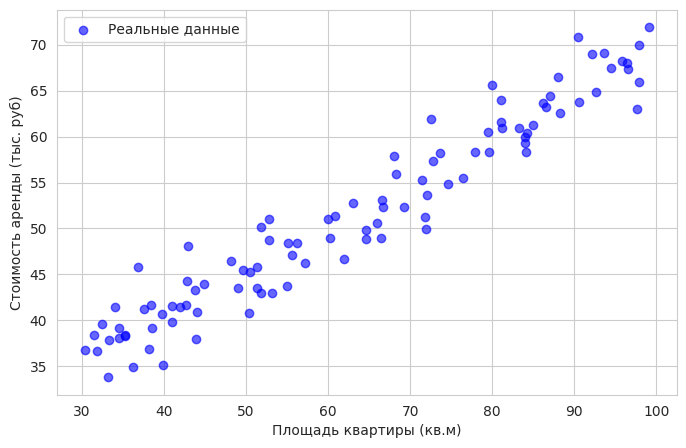

In [ ]:
np.random.seed(42)

# Генерируем 100 квартир
# Площадь от 30 до 100 кв.м.
# Размерность: X ∈ ℝ^(n×1), где n = 100 (количество объектов)
X = 30 + 70 * np.random.rand(100, 1)  # X.shape = (100, 1)

# Истинная зависимость: Цена = 0.5 * Площадь + 20 (тыс. руб) + Шум
# Размерность: y ∈ ℝ^n, где n = 100
# Формула: y = w_true * X + b_true + ε, где w_true = 0.5, b_true = 20, ε ~ N(0, 3²)
y = 0.5 * X + 20 + np.random.normal(0, 3, (100, 1))  # y.shape = (100, 1)

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Реальные данные')
plt.xlabel('Площадь квартиры (кв.м)')
plt.ylabel('Стоимость аренды (тыс. руб)')
plt.legend()
plt.show()

**Вопросы:**
*   Как будет выглядеть "модель"?
*   Как будем искать ее параметры?




### Ответ

Исходя из графика самый первый вариант, который приходит в голову — линейная модель вида

$$
y = wx + b,
$$

где:
*   $w \in \mathbb{R}$ (weight/slope) — наклон (коэффициент при $x$), скаляр.
*   $b \in \mathbb{R}$ (bias/intercept) — сдвиг, скаляр.
*   $x \in \mathbb{R}$ — входной признак (площадь квартиры).
*   $y \in \mathbb{R}$ — предсказание (стоимость аренды).

**В векторной форме для множества объектов:**
*   $\mathbf{X} \in \mathbb{R}^{n \times 1}$ — матрица признаков (n объектов, 1 признак).
*   $\mathbf{y} \in \mathbb{R}^{n}$ — вектор целевых значений (n объектов).
*   $\mathbf{\hat{y}} = \mathbf{X}w + b \in \mathbb{R}^{n}$ — вектор предсказаний.

**Проблема:** Таких прямых можно провести бесконечно много. Какая из них "лучшая"?

**Решение**:
Нам нужно минимизировать ошибку. Чаще всего используют **MSE (Mean Squared Error)** — среднеквадратичную ошибку, которая определяется следующим образом

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(y_i - (wx_i + b))^2,
$$

где:
*   $n$ — количество объектов в выборке.
*   $y_i \in \mathbb{R}$ — истинное значение зависимой переменной для $i$-го объекта.
*   $x_i \in \mathbb{R}$ — значение признака для $i$-го объекта.
*   $\text{MSE} \in \mathbb{R}$ — скалярная метрика (размерность: квадрат единиц измерения $y$).

**В векторной форме:**
$$
\text{MSE} = \frac{1}{n} \|\mathbf{y} - \mathbf{\hat{y}}\|^2 = \frac{1}{n} \|\mathbf{y} - (\mathbf{X}w + b)\|^2,
$$
где $\|\cdot\|$ — евклидова норма вектора.

Мы хотим, чтобы сумма квадратов расстояний от точек до прямой была минимальной.

## Простейшая модель регрессии

Используя LLM для генерации кода, найдите коэффициенты $w$ и $b$ модели для рассмотренного набора данных при помощи класса `LinearRegression` из библиотеки `sklearn`. Постройте на одном графике исходные данные и полученную прямую.

Коэффициент w (наклон): 0.4803
Коэффициент b (смещение): 21.2364


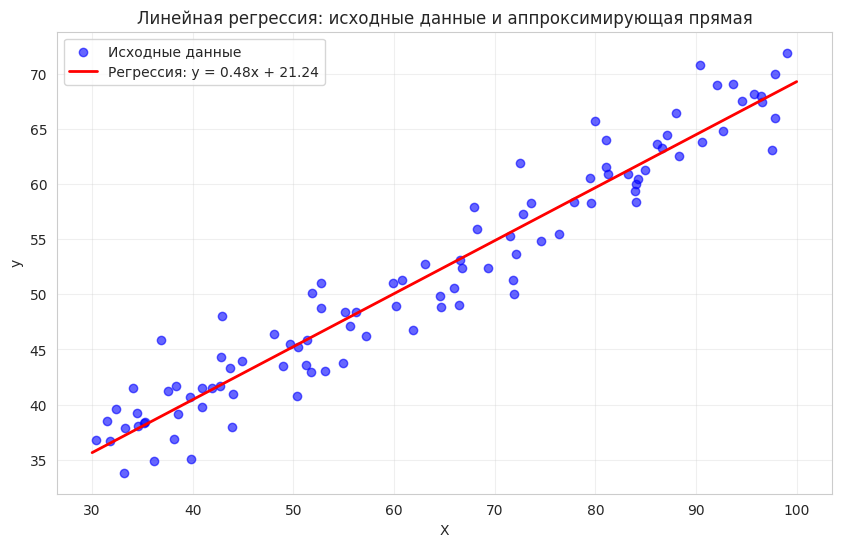

In [ ]:
# Создаем и обучаем модель линейной регрессии
# Размерности входных данных:
#   X ∈ ℝ^(n×1), где n = 100 (количество объектов)
#   y ∈ ℝ^n (вектор целевых значений)
model = LinearRegression()
model.fit(X, y)  # Обучаем модель: находим оптимальные w и b

# Извлекаем параметры модели
# model.coef_ имеет размерность (1, 1) для одномерной регрессии
# w ∈ ℝ — коэффициент наклона (вес признака)
w = model.coef_[0][0]  # коэффициент при X (наклон), размерность: скаляр

# model.intercept_ имеет размерность (1,)
# b ∈ ℝ — свободный член (смещение)
b = model.intercept_[0]  # свободный член (смещение), размерность: скаляр

print(f"Коэффициент w (наклон): {w:.4f}")
print(f"Коэффициент b (смещение): {b:.4f}")

plt.figure(figsize=(10, 6))

# Исходные данные: X ∈ ℝ^(100×1), y ∈ ℝ^100
plt.scatter(X, y, color='blue', alpha=0.6, label='Исходные данные')

# Прямая регрессии: создаем точки для визуализации линии
# X_plot ∈ ℝ^(100×1) — равномерно распределенные точки для построения линии
X_plot = np.linspace(30, 100, 100).reshape(-1, 1)  # диапазон для построения линии
# y_plot ∈ ℝ^100 — предсказания модели для точек X_plot
y_plot = model.predict(X_plot)  # Применяем модель: y_plot = X_plot * w + b
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Регрессия: y = {w:.2f}x + {b:.2f}')

# Оформление графика
plt.xlabel('X (площадь, кв.м)')
plt.ylabel('y (цена, тыс. руб)')
plt.title('Линейная регрессия: исходные данные и аппроксимирующая прямая')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Должно получиться что-то типа

*    Коэффициент w (наклон): 0.4803
*    Коэффициент b (смещение): 21.2364

## Оценка модели

**Вопросы**:

*    Как понять, хорошая ли модель?
*    Какие метрики разумно рассмотреть?

### Ответ

Чтобы честно оценить модель, мы делим данные на две части:
*   **Train (Обучающая выборка):** $\mathbf{X}_{train} \in \mathbb{R}^{n_{train} \times d}$, $\mathbf{y}_{train} \in \mathbb{R}^{n_{train}}$. На этих данных модель ищет параметры $w$ и $b$.
*   **Test (Тестовая выборка):** $\mathbf{X}_{test} \in \mathbb{R}^{n_{test} \times d}$, $\mathbf{y}_{test} \in \mathbb{R}^{n_{test}}$. Эти данные модель не видит при обучении. Мы используем их только для финальной проверки.

Просто сказать "ошибка маленькая" недостаточно. При условии, что $\mathbf{y} \in \mathbb{R}^{n}$ — истинное значение зависимой переменной, $\mathbf{\hat{y}} \in \mathbb{R}^{n}$ — предсказание модели, обычно используют следующие метрики:

#### a) MSE (Mean Squared Error)
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \|\mathbf{y} - \mathbf{\hat{y}}\|^2 $$
Средний квадрат ошибки.
*   **Размерность:** $\text{MSE} \in \mathbb{R}$ (квадрат единиц измерения $y$, например, (тыс. руб)²).
*   **Плюс:** Сильно штрафует за большие ошибки (из-за квадрата). Удобна для оптимизации (гладкая функция).
*   **Минус:** Размерность — "квадраты" сложно интерпретировать. Чувствительна к выбросам.

#### b) MAE (Mean Absolute Error)
$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| = \frac{1}{n} \sum_{i=1}^{n} |\mathbf{y} - \mathbf{\hat{y}}|_i $$
Средняя абсолютная ошибка.
*   **Размерность:** $\text{MAE} \in \mathbb{R}$ (единицы измерения $y$, например, тыс. руб).
*   **Плюс:** Интерпретируема! Показывает, на сколько единиц в среднем ошибается модель.
*   **Минус:** Модуль — сложная функция для математической оптимизации (не дифференцируема в нуле).

#### c) $R^2$ Score (Коэффициент детерминации)
Показывает, какую долю дисперсии (разброса) данных объясняет наша модель. Сравнивает нашу модель с наивной моделью, которая всегда предсказывает среднее значение ($\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i$).
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} = 1 - \frac{\|\mathbf{y} - \mathbf{\hat{y}}\|^2}{\|\mathbf{y} - \bar{y}\mathbf{1}\|^2} $$
где $\mathbf{1} \in \mathbb{R}^{n}$ — вектор из единиц.

*   **Размерность:** $R^2 \in \mathbb{R}$, безразмерная величина (от 0 до 1, или может быть отрицательной).
*   $R^2 = 1$: Идеальное предсказание.
*   $R^2 = 0$: Модель работает так же, как предсказание среднего (бесполезна).
*   $R^2 < 0$: Модель хуже, чем просто среднее.

### Реализация

Используя LLM для генерации кода разбейте данные `X` и `y` на тренировочную и тестовую части в сооношении `80:20` при помощи `train_test_split` из библиотеки `sklearn`. Для воспроизводимости зафиксируйте `random_state=42`.

Обучите модель на тренировочных данных, оцените на тестовых, используя метрики `MAE` и `r2_score`.

In [ ]:
# Разбиваем данные: 80% на обучение, 20% на тест
# Размерности после разбиения:
#   X_train ∈ ℝ^(n_train×1), где n_train ≈ 80 (80% от 100)
#   X_test ∈ ℝ^(n_test×1), где n_test ≈ 20 (20% от 100)
#   y_train ∈ ℝ^n_train, y_test ∈ ℝ^n_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Учим заново только на Train
# Модель находит оптимальные параметры: w ∈ ℝ, b ∈ ℝ
model = LinearRegression()
model.fit(X_train, y_train)  # Обучаем на X_train, y_train

# Предсказываем на Test
# y_test_pred ∈ ℝ^n_test — вектор предсказаний для тестовой выборки
# Формула: y_test_pred = X_test * w + b
y_test_pred = model.predict(X_test)

# Считаем метрики
# Все метрики — скаляры (размерность: ℝ)
mse = mean_squared_error(y_test, y_test_pred)  # MSE ∈ ℝ, размерность: (тыс. руб)²
mae = mean_absolute_error(y_test, y_test_pred)  # MAE ∈ ℝ, размерность: тыс. руб
r2 = r2_score(y_test, y_test_pred)  # R² ∈ ℝ, безразмерная величина

print(f"MAE (средняя ошибка в тыс. руб): {mae:.4f}")
print(f"R2 (доля объясненной дисперсии): {r2:.4f}")

MAE (средняя ошибка в тыс. руб): 1.7740
R2 (доля объясненной дисперсии): 0.9478


Должно получиться что-то типа

*    MAE: 1.7740
*    R2: 0.9478

## Нелинейность

А если зависимость сложнее? Например, вот такая

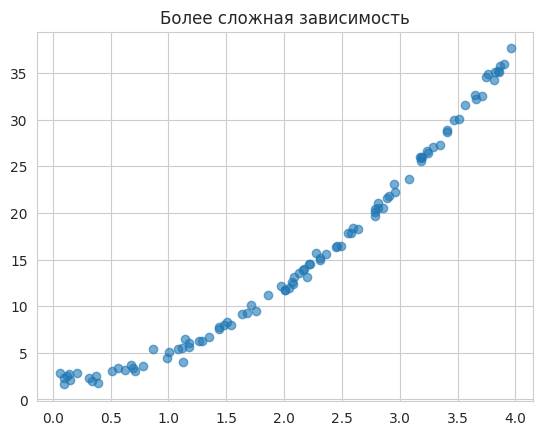

In [ ]:
# Генерируем данные с квадратичной зависимостью
# Размерности: X_quad ∈ ℝ^(100×1), y_quad ∈ ℝ^100
# Истинная зависимость: y = 2*x² + x + 2 + ε, где ε ~ N(0, 0.5²)
X_quad = 4 * np.random.rand(100, 1)  # X_quad.shape = (100, 1)
y_quad = 2 * X_quad**2 + X_quad + 2 + np.random.normal(0, 0.5, (100, 1))  # y_quad.shape = (100, 1)

plt.scatter(X_quad, y_quad, alpha=0.6)
plt.title("Более сложная зависимость")
plt.show()

Постройте линейную модель для этих данных, отобразите линию на графике

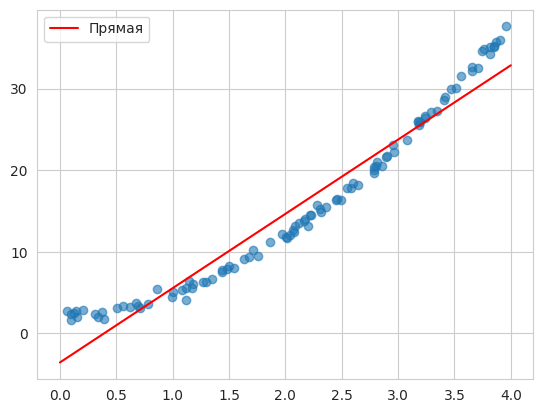

In [6]:
lr_quad = LinearRegression()
lr_quad.fit(X_quad, y_quad)

# Сортируем X для красивой линии графика
X_range = np.linspace(0, 4, 100).reshape(-1, 1)
y_quad_pred = lr_quad.predict(X_range)

plt.scatter(X_quad, y_quad, alpha=0.6)
plt.plot(X_range, y_quad_pred, color='red', label='Прямая')
plt.legend()
plt.show()

**Вопросы:**

*    Что видим?
*    Что будем делать?

### Ответ

Мы наблюдаем типичный случай недообучения. Модель слишком проста для данных. Истинная зависимость нелинейна (парабола), а мы пытаемся описать её прямой линией.

**Что будем делать?**

Мы не будем менять алгоритм (это по-прежнему будет Линейная Регрессия). Вместо этого мы изменим данные.

Если зависимость выглядит как парабола $y = ax^2 + bx + c$, значит, нам не хватает слагаемого с $x^2$. Давайте создадим этот признак искусственно!

Представим, что у нас есть не один признак $x$, а два:
1.  $x_1 = x$ (наш исходный признак)
2.  $x_2 = x^2$ (квадрат исходного признака)

**Размерности:**
*   Исходные данные: $\mathbf{X} \in \mathbb{R}^{n \times 1}$ (один признак)
*   Расширенные данные: $\mathbf{X}_{poly} \in \mathbb{R}^{n \times 2}$ (два признака: $x$ и $x^2$)
*   Вектор весов: $\mathbf{w} = [w_1, w_2]^T \in \mathbb{R}^{2}$
*   Смещение: $b \in \mathbb{R}$

Тогда уравнение регрессии превратится в:

$$ y = w_1 \cdot x_1 + w_2 \cdot x_2 + b $$

или, подставляя обратно:

$$ y = w_1 \cdot x + w_2 \cdot x^2 + b $$

**В векторной форме:**
$$ \mathbf{\hat{y}} = \mathbf{X}_{poly} \mathbf{w} + b \mathbf{1} \in \mathbb{R}^{n} $$
где $\mathbf{1} \in \mathbb{R}^{n}$ — вектор из единиц.

**Важный момент:** Для модели `LinearRegression` это всё ещё линейная задача. Она просто ищет веса $w_1$ и $w_2$ для двух входных колонок. Она "не знает", что вторая колонка получена возведением первой в квадрат.

### Реализация

Добавьте к исходным данным `X_quad` колонку с квадратом независимой переменной, обучите модель линейной регрессии, постройте график.

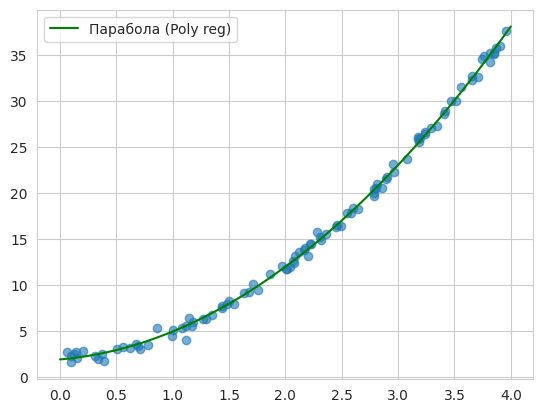

R2 score: 0.9982724875914658


In [ ]:
# Добавляем квадрат признака (полиномиальная инженерия признаков)
# Исходные данные: X_quad ∈ ℝ^(100×1)
# После расширения: X_quad_new ∈ ℝ^(100×2)
#   Первая колонка: x (исходный признак)
#   Вторая колонка: x² (квадрат признака)
X_quad_new = np.hstack([X_quad, X_quad**2])  # X_quad_new.shape = (100, 2)

# Обучаем модель на расширенных признаках
# Модель находит: w ∈ ℝ² (вектор из 2 весов), b ∈ ℝ (смещение)
lr_poly = LinearRegression()
lr_poly.fit(X_quad_new, y_quad)  # Обучаем: y = X_quad_new @ w + b

# Предсказание для визуализации
# X_range ∈ ℝ^(100×1) — точки для построения графика
# X_range_poly ∈ ℝ^(100×2) — расширенные признаки для этих точек
X_range_poly = np.hstack([X_range, X_range**2])  # X_range_poly.shape = (100, 2)
# y_poly_pred ∈ ℝ^100 — предсказания модели
y_poly_pred = lr_poly.predict(X_range_poly)  # y_poly_pred = X_range_poly @ w + b

plt.scatter(X_quad, y_quad, alpha=0.6)
plt.plot(X_range, y_poly_pred, color='green', label='Парабола (Poly reg)')
plt.legend()
plt.show()

# Оцениваем качество модели
# R² ∈ ℝ — безразмерная метрика
print("R2 score:", r2_score(y_quad, lr_poly.predict(X_quad_new)))

## Автоматизация

Зависимость не обязана быть линейной или квадратичной, она может быть любой: синус, корень, экспонента и тд. Подбирать вручную как-то совершенно не хочется. Есть желание этот процесс инженерии признаков как-то автоматизировать.

**Вопрос**:
*    Как можно автоматизировать процесс инженерии признаков?

### Ответ

Из математического анализа мы знаем, что любую гладкую функцию $f(x)$ в окрестности точки можно приблизить многочленом (полиномом) степени $d$:

$$ f(x) \approx w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_d x^d $$

**Размерности:**
*   Исходные данные: $\mathbf{X} \in \mathbb{R}^{n \times 1}$ (один признак)
*   После `PolynomialFeatures(degree=d)`: $\mathbf{X}_{poly} \in \mathbb{R}^{n \times (d+1)}$
*   Вектор весов: $\mathbf{w} = [w_0, w_1, \dots, w_d]^T \in \mathbb{R}^{d+1}$
*   Предсказания: $\mathbf{\hat{y}} = \mathbf{X}_{poly} \mathbf{w} \in \mathbb{R}^{n}$

Это значит, что если мы добавим в наши данные достаточно много степеней $x$ ($x^2, x^3, \dots, x^{15}$), то обычная Линейная Регрессия сможет, подбирая веса $w_i$, "собрать" из них кривую любой сложности (хоть синусоиду, хоть экспоненту).

В библиотеке `sklearn` есть класс `PolynomialFeatures`. Этот класс делает две вещи:

1.  **Степени:** Генерирует $x^2, x^3$ и т.д.
2.  **Взаимодействия (Interactions):** Если признаков несколько, он создает их произведения.

**Пример:**
Если у нас есть два признака $a$ и $b$ (2D массив $\mathbf{X} \in \mathbb{R}^{n \times 2}$), и мы просим `degree=2`, то на выходе получим 6 признаков:
$$ [1, \quad a, \quad b, \quad a^2, \quad \underbrace{a \cdot b}_{\text{взаимодействие}}, \quad b^2] $$

**Размерности для примера:**
*   Вход: $\mathbf{X} \in \mathbb{R}^{n \times 2}$ (признаки $a$ и $b$)
*   Выход: $\mathbf{X}_{poly} \in \mathbb{R}^{n \times 6}$ (6 полиномиальных признаков)
*   Веса: $\mathbf{w} \in \mathbb{R}^{6}$

Это позволяет модели учитывать не только кривизну отдельных признаков, но и то, как они влияют друг на друга (синергию).

### Реализация

Рассмотрим вот такой набор данных

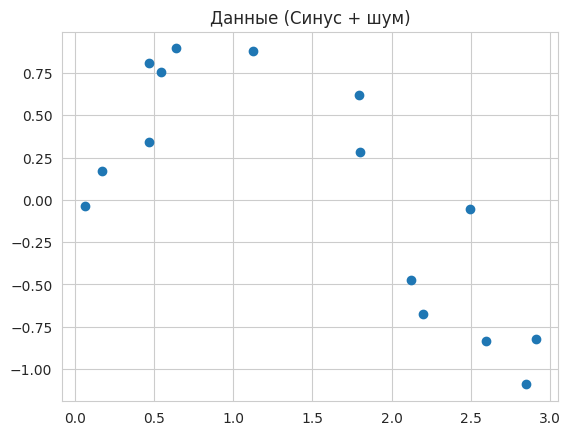

In [ ]:
np.random.seed(42)

# Генерируем данные с синусоидальной зависимостью
# Размерности: X_sin ∈ ℝ^(15×1), y_sin ∈ ℝ^15
# Истинная зависимость: y = sin(1.5*x) + ε, где ε ~ N(0, 0.2²)
X_sin = 3 * np.random.rand(15, 1)  # X_sin.shape = (15, 1)
y_sin = np.sin(X_sin * 1.5) + np.random.normal(0, 0.2, (15, 1))  # y_sin.shape = (15, 1)

# Тестовая выборка для проверки
# Размерности: X_sin_test ∈ ℝ^(5×1), y_sin_test ∈ ℝ^5
X_sin_test = 3 * np.random.rand(5, 1)  # X_sin_test.shape = (5, 1)
y_sin_test = np.sin(X_sin_test * 1.5) + np.random.normal(0, 0.2, (5, 1))  # y_sin_test.shape = (5, 1)

plt.scatter(X_sin, y_sin)
plt.title("Данные (Синус + шум)")
plt.show()

С помощью LLM сгенерируйте код, который:
1.  Использует `PolynomialFeatures` с очень высокой степенью (например, 15) для тренировочных и тестовых данных.
2.  Обучит `LinearRegression` на этих признаках.
3.  Построит график с Train (точки), Test (точки) и линией модели.
4.  Выведет MSE для Train и Test.

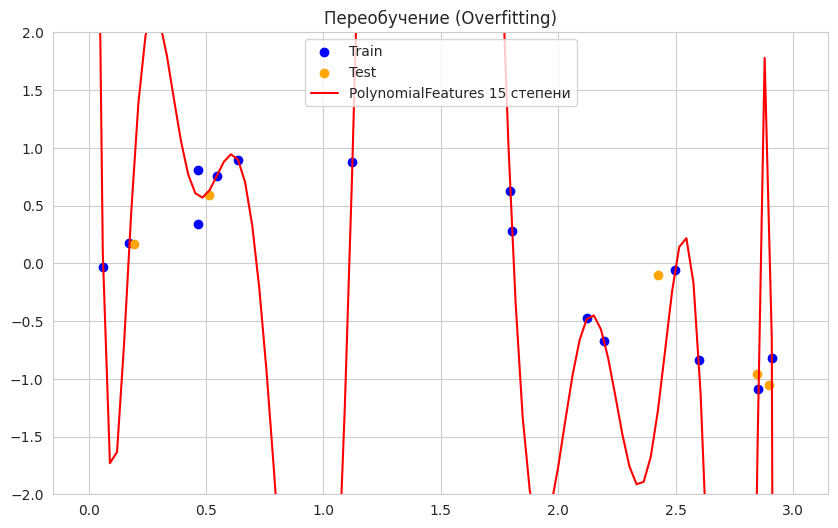

MSE Train: 0.0073
MSE Test: 1.8666


In [ ]:
degree = 15  # Степень полинома
# Создаем трансформер для генерации полиномиальных признаков
# Для degree=15 и 1 признака получим (15+1) = 16 признаков: [1, x, x², ..., x¹⁵]
poly = PolynomialFeatures(degree=degree)

# Применяем трансформацию к обучающим данным
# X_sin ∈ ℝ^(15×1) → X_sin_poly ∈ ℝ^(15×16)
# Признаки: [1, x, x², x³, ..., x¹⁵]
X_sin_poly = poly.fit_transform(X_sin)  # X_sin_poly.shape = (15, 16)

# Применяем трансформацию к тестовым данным (используем уже обученный трансформер)
# X_sin_test ∈ ℝ^(5×1) → X_sin_test_poly ∈ ℝ^(5×16)
X_sin_test_poly = poly.transform(X_sin_test)  # X_sin_test_poly.shape = (5, 16)

# Обучаем модель линейной регрессии
# Модель находит: w ∈ ℝ^16 (16 весов для полиномиальных признаков), b ∈ ℝ
model_overfit = LinearRegression()
model_overfit.fit(X_sin_poly, y_sin)  # y_sin ∈ ℝ^15

# Рисуем результат
# Создаем точки для визуализации линии
X_plot = np.linspace(0, 3, 100).reshape(-1, 1)  # X_plot ∈ ℝ^(100×1)
X_plot_poly = poly.transform(X_plot)  # X_plot_poly ∈ ℝ^(100×16)
y_plot = model_overfit.predict(X_plot_poly)  # y_plot ∈ ℝ^100

plt.figure(figsize=(10, 6))
plt.scatter(X_sin, y_sin, color='blue', label='Train')
plt.scatter(X_sin_test, y_sin_test, color='orange', label='Test')
plt.plot(X_plot, y_plot, color='red', label=f'PolynomialFeatures {degree} степени')
plt.ylim(-2, 2)
plt.legend()
plt.title("Переобучение (Overfitting)")
plt.show()

# Вычисляем метрики
# MSE ∈ ℝ — скаляр (размерность: квадрат единиц измерения y)
print(f"MSE Train: {mean_squared_error(y_sin, model_overfit.predict(X_sin_poly)):.4f}")
print(f"MSE Test: {mean_squared_error(y_sin_test, model_overfit.predict(X_sin_test_poly)):.4f}")

**Вопросы:**

*    Что произошло?
*    Как убедиться (на что смотреть)?
*    Как исправить?

### Ответ

Это классическое Переобучение.

У модели было слишком много свободы (степень 15). Чтобы пройти через каждую точку (включая шумовые) на тренировочной выборке, полиному пришлось сильно извиваться.

Математически это выражается в том, что веса $\mathbf{w} \in \mathbb{R}^{d}$ становятся огромными (порядка $10^5$ или $10^6$) и имеют разные знаки, чтобы компенсировать друг друга.

**Как исправить? Регуляризация**

Мы должны запретить модели "жульничать" и использовать огромные веса. Мы добавляем штраф к функции потерь. Теперь модель ищет баланс: "хочу маленькую ошибку предсказания, но не ценой гигантских весов".

Существует два основных типа регуляризации:

#### 1. Ridge Regression ($L_2$ регуляризация)
Мы добавляем сумму **квадратов** весов:
$$ L_{Ridge} = \text{MSE} + \alpha \sum_{i=1}^{d} w_i^2 = \frac{1}{n}\|\mathbf{y} - \mathbf{\hat{y}}\|^2 + \alpha \|\mathbf{w}\|^2 $$

**Размерности:**
*   $\mathbf{w} \in \mathbb{R}^{d}$ — вектор весов (d признаков)
*   $\alpha \in \mathbb{R}$ — гиперпараметр регуляризации (безразмерный)
*   $\|\mathbf{w}\|^2 = \sum_{i=1}^{d} w_i^2 \in \mathbb{R}$ — квадрат нормы вектора весов
*   $L_{Ridge} \in \mathbb{R}$ — функция потерь (размерность: квадрат единиц измерения $y$)

*   **Особенность:** Сильно штрафует за очень большие веса, но почти никогда не зануляет их полностью. Веса становятся маленькими ($0.01, 0.005$), распределяясь между всеми признаками.
*   **Результат:** Гладкая кривая. Хорошо работает, когда все признаки понемногу важны.

#### 2. Lasso Regression ($L_1$ регуляризация)
Мы добавляем сумму **модулей** весов:
$$ L_{Lasso} = \text{MSE} + \alpha \sum_{i=1}^{d} |w_i| = \frac{1}{n}\|\mathbf{y} - \mathbf{\hat{y}}\|^2 + \alpha \|\mathbf{w}\|_1 $$

**Размерности:**
*   $\mathbf{w} \in \mathbb{R}^{d}$ — вектор весов
*   $\alpha \in \mathbb{R}$ — гиперпараметр регуляризации
*   $\|\mathbf{w}\|_1 = \sum_{i=1}^{d} |w_i| \in \mathbb{R}$ — $L_1$-норма вектора весов
*   $L_{Lasso} \in \mathbb{R}$ — функция потерь

*   **Особенность:** Обладает свойством **отбора признаков (Feature Selection)**. Она склонна занулять веса у наименее важных признаков (делать их строго $0$).
*   **Результат:** Модель становится проще и интерпретируемее. Если мы дали модели шумные признаки, Lasso их просто выкинет.

*Параметр $\alpha$ (alpha) отвечает за силу регуляризации. Чем он больше, тем проще модель (ближе к прямой линии).*

### Реализация

Выведите на экран коэффициенты модели, полученной на предыдущем шаге

In [10]:
print("Коэффициенты модели:", model_overfit.coef_)

Коэффициенты модели: [[ 3.26401798e+00 -4.84985072e+02  4.63279404e+03 -1.98718041e+04
   4.25044462e+04 -3.98343309e+04 -6.13329526e+03  4.32679378e+04
  -1.88804276e+04 -3.24444273e+04  5.04701397e+04 -3.34887567e+04
   1.28241919e+04 -2.93753707e+03  3.75574194e+02 -2.06985347e+01]]


##

С помощью LLM сгенерируйте код, который:
1.  Обучит модель `Ridge` на тех же полиномиальных данных.
2.  Обучит модель `Lasso` на тех же данных.
3.  Построит графики для сравнения переобученной модели и регуляризованных.
4.  Выведет MSE на тесте.
5.  Выведите коэффициенты для каждой модели (чтобы проверить, занулила ли Lasso веса).

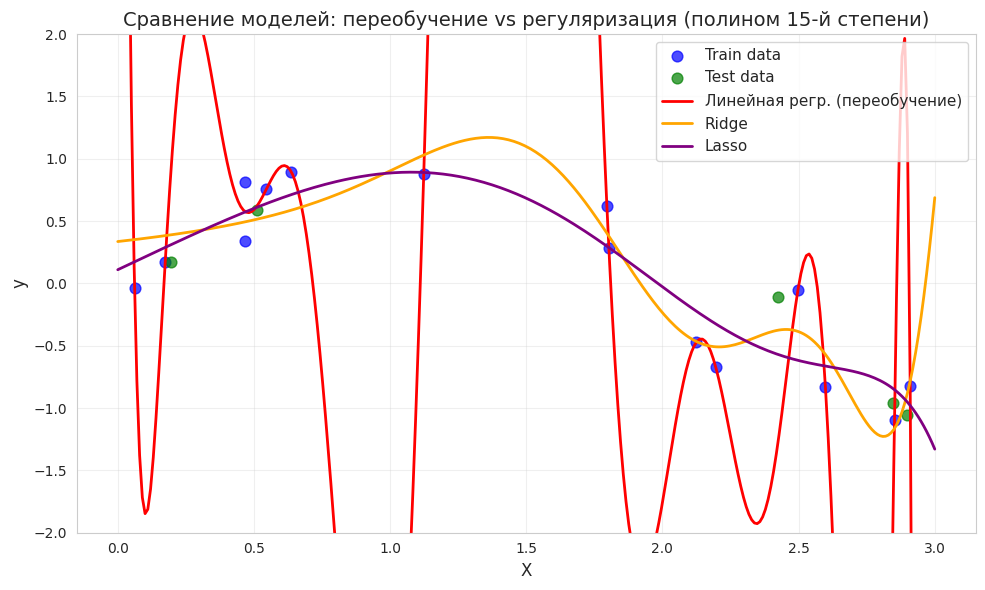

In [ ]:
# Обучаем три модели на одних и тех же полиномиальных признаках
# X_sin_poly ∈ ℝ^(15×16), y_sin ∈ ℝ^15

# 1. Линейная регрессия без регуляризации (переобучение)
# Находит: w_lr ∈ ℝ^16, b_lr ∈ ℝ
model_lr = LinearRegression()
model_lr.fit(X_sin_poly, y_sin)

# 2. Ridge регрессия (L2 регуляризация)
# Находит: w_ridge ∈ ℝ^16, b_ridge ∈ ℝ
# Функция потерь: MSE + α * ||w||², где α = 1.0
model_ridge = Ridge(alpha=1.0)  # alpha — сила регуляризации
model_ridge.fit(X_sin_poly, y_sin)

# 3. Lasso регрессия (L1 регуляризация)
# Находит: w_lasso ∈ ℝ^16, b_lasso ∈ ℝ
# Функция потерь: MSE + α * ||w||₁, где α = 0.01
# max_iter для сходимости (Lasso требует больше итераций)
model_lasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1)
model_lasso.fit(X_sin_poly, y_sin)

# Предсказания на обучающей выборке
# Все предсказания: y_*_train ∈ ℝ^15
y_lr_train = model_lr.predict(X_sin_poly)
y_ridge_train = model_ridge.predict(X_sin_poly)
y_lasso_train = model_lasso.predict(X_sin_poly)

# Предсказания на тестовой выборке
# X_sin_test_poly ∈ ℝ^(5×16), все предсказания: y_*_test ∈ ℝ^5
y_lr_test = model_lr.predict(X_sin_test_poly)
y_ridge_test = model_ridge.predict(X_sin_test_poly)
y_lasso_test = model_lasso.predict(X_sin_test_poly)

# Вычисляем метрики на тестовой выборке
# Все метрики: MSE ∈ ℝ (скаляр, размерность: квадрат единиц измерения y)
mse_lr_test = mean_squared_error(y_sin_test, y_lr_test)
mse_ridge_test = mean_squared_error(y_sin_test, y_ridge_test)
mse_lasso_test = mean_squared_error(y_sin_test, y_lasso_test)

# Визуализация
plt.figure(figsize=(10, 6))

plt.scatter(X_sin, y_sin, color='blue', alpha=0.7, s=60, label='Train data')
plt.scatter(X_sin_test, y_sin_test, color='green', alpha=0.7, s=60, label='Test data')

# Плотная сетка для предсказаний
# X_plot ∈ ℝ^(300×1) → X_plot_poly ∈ ℝ^(300×16)
X_plot = np.linspace(0, 3, 300).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

# Предсказания для визуализации: y_*_plot ∈ ℝ^300
y_lr_plot = model_lr.predict(X_plot_poly)
y_ridge_plot = model_ridge.predict(X_plot_poly)
y_lasso_plot = model_lasso.predict(X_plot_poly)

plt.plot(X_plot, y_lr_plot, color='red', linewidth=2, label='Линейная регр. (переобучение)')
plt.plot(X_plot, y_ridge_plot, color='orange', linewidth=2, label='Ridge')
plt.plot(X_plot, y_lasso_plot, color='purple', linewidth=2, label='Lasso')

# Оформление
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Сравнение моделей: переобучение vs регуляризация (полином 15-й степени)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ylim(-2, 2)
plt.show()


In [ ]:
print("MSE на тестовой выборке:")
print(f"Линейная регрессия:    {mse_lr_test:.6f}")
print(f"Ridge:                {mse_ridge_test:.6f}")
print(f"Lasso:                {mse_lasso_test:.6f}")

# Выводим коэффициенты моделей
# model_*.coef_ ∈ ℝ^16 (вектор весов для 16 полиномиальных признаков)
print("Линейная регр.:", np.round(model_lr.coef_, 4))
print("Ridge:         ", np.round(model_ridge.coef_, 4))
print("Lasso:         ", np.round(model_lasso.coef_, 4))

# Проверяем, сколько коэффициентов занулено в Lasso
# Lasso имеет свойство отбора признаков (feature selection)
# Зануляет веса наименее важных признаков
n_zero_lasso = np.sum(np.abs(model_lasso.coef_) < 1e-6)
print(f"\nВ модели Lasso занулено коэффициентов: {n_zero_lasso} из {len(model_lasso.coef_)}")

MSE на тестовой выборке:
Линейная регрессия:    1.866594
Ridge:                0.039585
Lasso:                0.052467
Линейная регр.: [[ 3.26400000e+00 -4.84985100e+02  4.63279400e+03 -1.98718041e+04
   4.25044462e+04 -3.98343309e+04 -6.13329530e+03  4.32679378e+04
  -1.88804276e+04 -3.24444273e+04  5.04701397e+04 -3.34887567e+04
   1.28241919e+04 -2.93753710e+03  3.75574200e+02 -2.06985000e+01]]
Ridge:          [ 0.      0.243   0.1443  0.08    0.0558  0.0522  0.0489  0.028  -0.0165
 -0.0642 -0.0632  0.0217  0.0892 -0.0698  0.019  -0.0018]
Lasso:          [ 0.0000e+00  1.0324e+00  0.0000e+00 -1.2600e-01 -1.4470e-01 -0.0000e+00
  1.1000e-02  2.8000e-03  5.0000e-04  0.0000e+00 -0.0000e+00 -0.0000e+00
 -0.0000e+00 -0.0000e+00 -0.0000e+00  0.0000e+00]

В модели Lasso занулено коэффициентов: 5 из 16
